<a href="https://colab.research.google.com/github/Anu0034/Projects/blob/main/penguin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/penguins.csv')
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.tail()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE
343,49.9,16.1,213.0,5400.0,MALE


In [ ]:
df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
df.shape

(344, 5)

In [ ]:
df.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [ ]:
df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['sex']=lab.fit_transform(df['sex'])
df['sex']

0      2
1      1
2      1
3      3
4      1
      ..
339    3
340    1
341    2
342    1
343    2
Name: sex, Length: 344, dtype: int64

In [ ]:
a=df['culmen_length_mm'].mean()
df['culmen_length_mm'].fillna(a,inplace=True)
b=df['culmen_depth_mm'].mean()
df['culmen_depth_mm'].fillna(b,inplace=True)
c=df['flipper_length_mm'].mean()
df['flipper_length_mm'].fillna(c,inplace=True)
d=df['body_mass_g'].mean()
df['body_mass_g'].fillna(d,inplace=True)
e=df['sex'].mode()[0]
df['sex'].fillna(e,inplace=True)
df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
df=df.iloc[:,:]
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.10000,18.70000,181.00000,3750.000000,2
1,39.50000,17.40000,186.00000,3800.000000,1
2,40.30000,18.00000,195.00000,3250.000000,1
3,43.92193,17.15117,214.01462,4201.754386,3
4,36.70000,19.30000,193.00000,3450.000000,1
...,...,...,...,...,...
339,43.92193,17.15117,214.01462,4201.754386,3
340,46.80000,14.30000,215.00000,4850.000000,1
341,50.40000,15.70000,222.00000,5750.000000,2
342,45.20000,14.80000,212.00000,5200.000000,1


In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  data=KMeans(n_clusters=i,init='k-means++',random_state=42)
  data.fit(df)
  wcss.append(data.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
print(wcss)

[242469957.7656127, 82413694.84598385, 52218717.075353354, 29372755.345446, 16473494.575507581, 11082774.028294042, 8351836.310667342, 6038216.253854393, 4906112.721848579, 3714392.914683305]


Text(0.5, 1.0, 'Elbow point Evaluation')

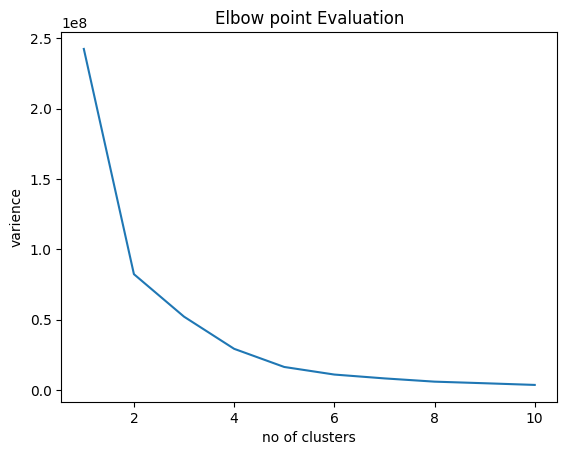

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.xlabel('no of clusters')
plt.ylabel('varience')
plt.title('Elbow point Evaluation')

In [ ]:
model=KMeans(n_clusters=6,init='k-means++',random_state=42)
y_means=model.fit_predict(df)
y_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5, 5, 0, 2, 0, 5, 5, 1, 0, 3, 0, 5, 0, 5, 2, 5, 0, 2, 0, 2, 0, 5,
       5, 5, 5, 5, 5, 0, 0, 5, 0, 5, 0, 5, 0, 2, 5, 5, 0, 1, 0, 5, 0, 2,
       0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 5, 5, 5, 0, 5, 0, 2, 5, 2, 0, 5,
       0, 2, 0, 2, 5, 5, 5, 2, 5, 2, 5, 5, 5, 5, 0, 1, 5, 2, 0, 5, 5, 0,
       5, 5, 5, 2, 0, 2, 0, 2, 5, 2, 0, 2, 5, 1, 0, 2, 0, 5, 5, 5, 0, 1,
       5, 1, 0, 2, 5, 2, 0, 5, 0, 0, 0, 0, 0, 5, 0, 5, 0, 2, 0, 5, 0, 0,
       0, 2, 0, 5, 0, 5, 0, 2, 0, 0, 0, 5, 0, 5, 2, 0, 0, 5, 5, 5, 0, 5,
       5, 5, 5, 5, 0, 5, 2, 5, 5, 5, 5, 2, 5, 2, 0, 5, 0, 2, 5, 0, 0, 5,
       0, 2, 0, 5, 5, 2, 0, 2, 0, 2, 5, 5, 5, 1, 0, 2, 5, 5, 5, 0, 5, 2,
       0, 2, 0, 5, 0, 5, 5, 2, 0, 0, 0, 2, 5, 5, 5, 5, 5, 5, 0, 5, 2, 5,
       2, 4, 2, 4, 4, 2, 1, 1, 2, 1, 1, 4, 1, 4, 2, 4, 2, 4, 1, 4, 4, 1,
       2, 1, 1, 1, 2, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 4, 2, 4, 5, 4, 2, 1,
       4, 1, 2, 4, 1, 4, 1, 4, 2, 1, 1, 1, 2, 1, 2, 4, 2, 4, 2, 4, 1, 4,
       1, 4, 1, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1,

In [ ]:
df['clusters']=y_means
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,clusters
0,39.10000,18.70000,181.00000,3750.000000,2,5
1,39.50000,17.40000,186.00000,3800.000000,1,5
2,40.30000,18.00000,195.00000,3250.000000,1,0
3,43.92193,17.15117,214.01462,4201.754386,3,2
4,36.70000,19.30000,193.00000,3450.000000,1,0
...,...,...,...,...,...,...
339,43.92193,17.15117,214.01462,4201.754386,3,2
340,46.80000,14.30000,215.00000,4850.000000,1,1
341,50.40000,15.70000,222.00000,5750.000000,2,4
342,45.20000,14.80000,212.00000,5200.000000,1,1


In [ ]:
x=df.iloc[:,:-1].values
x

array([[3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03, 2.00e+00],
       [3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03, 1.00e+00],
       [4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03, 1.00e+00],
       ...,
       [5.04e+01, 1.57e+01, 2.22e+02, 5.75e+03, 2.00e+00],
       [4.52e+01, 1.48e+01, 2.12e+02, 5.20e+03, 1.00e+00],
       [4.99e+01, 1.61e+01, 2.13e+02, 5.40e+03, 2.00e+00]])

In [ ]:
y=df.iloc[:,-1].values
y

array([5, 5, 0, 2, 0, 5, 5, 1, 0, 3, 0, 5, 0, 5, 2, 5, 0, 2, 0, 2, 0, 5,
       5, 5, 5, 5, 5, 0, 0, 5, 0, 5, 0, 5, 0, 2, 5, 5, 0, 1, 0, 5, 0, 2,
       0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 5, 5, 5, 0, 5, 0, 2, 5, 2, 0, 5,
       0, 2, 0, 2, 5, 5, 5, 2, 5, 2, 5, 5, 5, 5, 0, 1, 5, 2, 0, 5, 5, 0,
       5, 5, 5, 2, 0, 2, 0, 2, 5, 2, 0, 2, 5, 1, 0, 2, 0, 5, 5, 5, 0, 1,
       5, 1, 0, 2, 5, 2, 0, 5, 0, 0, 0, 0, 0, 5, 0, 5, 0, 2, 0, 5, 0, 0,
       0, 2, 0, 5, 0, 5, 0, 2, 0, 0, 0, 5, 0, 5, 2, 0, 0, 5, 5, 5, 0, 5,
       5, 5, 5, 5, 0, 5, 2, 5, 5, 5, 5, 2, 5, 2, 0, 5, 0, 2, 5, 0, 0, 5,
       0, 2, 0, 5, 5, 2, 0, 2, 0, 2, 5, 5, 5, 1, 0, 2, 5, 5, 5, 0, 5, 2,
       0, 2, 0, 5, 0, 5, 5, 2, 0, 0, 0, 2, 5, 5, 5, 5, 5, 5, 0, 5, 2, 5,
       2, 4, 2, 4, 4, 2, 1, 1, 2, 1, 1, 4, 1, 4, 2, 4, 2, 4, 1, 4, 4, 1,
       2, 1, 1, 1, 2, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 4, 2, 4, 5, 4, 2, 1,
       4, 1, 2, 4, 1, 4, 1, 4, 2, 1, 1, 1, 2, 1, 2, 4, 2, 4, 2, 4, 1, 4,
       1, 4, 1, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1,

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[3.720e+01, 1.810e+01, 1.780e+02, 3.900e+03, 2.000e+00],
       [4.610e+01, 1.510e+01, 2.150e+02, 5.100e+03, 2.000e+00],
       [4.550e+01, 1.500e+01, 2.200e+02, 5.000e+03, 2.000e+00],
       ...,
       [3.860e+01, 1.720e+01, 1.990e+02, 3.750e+03, 1.000e+00],
       [4.660e+01, 1.420e+01, 2.100e+02, 4.850e+03, 1.000e+00],
       [3.770e+01, 1.600e+01, 1.830e+02, 3.075e+03, 1.000e+00]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)
x_train

array([[-1.22485808,  0.51446525, -0.85073488, -0.38445286,  0.8028464 ],
       [ 0.3857437 , -1.00457005,  0.58548275,  1.11479958,  0.8028464 ],
       [ 0.27716381, -1.05520455,  0.77956621,  0.98986188,  0.8028464 ],
       ...,
       [-0.97150499,  0.05875466, -0.03558433, -0.57185941, -0.98125671],
       [ 0.47622695, -1.46028063,  0.39139929,  0.80245532, -0.98125671],
       [-1.13437483, -0.54885946, -0.65665141, -1.41518891, -0.98125671]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([5, 5, 1, 5, 1, 4, 4, 2, 5, 1, 1, 0, 0, 0, 1, 5, 5, 4, 4, 2, 5, 5,
       4, 4, 5, 5, 2, 2, 0, 5, 5, 5, 5, 5, 2, 0, 4, 5, 5, 5, 2, 1, 4, 5,
       2, 2, 4, 0, 5, 5, 5, 4, 4, 5, 5, 0, 0, 5, 5, 4, 2, 2, 4, 2, 4, 0,
       2, 5, 0, 0, 1, 2, 0, 4, 4, 4, 0, 0, 0, 2, 0, 1, 4, 0, 5, 5, 2, 5,
       1, 5, 2, 1, 4, 2, 2, 5, 5, 2, 1, 2, 0, 0, 0, 2], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.7884615384615384